In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.0.0'

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.shape

(10000, 14)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
len(data['RowNumber'].unique()), len(data['CustomerId'].unique())

(10000, 10000)

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


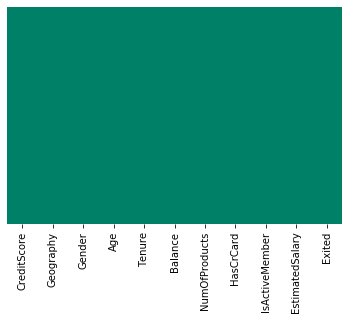

In [9]:
sb.heatmap(data.isna(),
          cbar = False,
          yticklabels = False,
          cmap = 'summer')
plt.show()

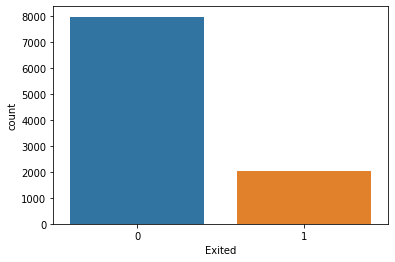

In [10]:
sb.countplot(data['Exited'])
plt.show()

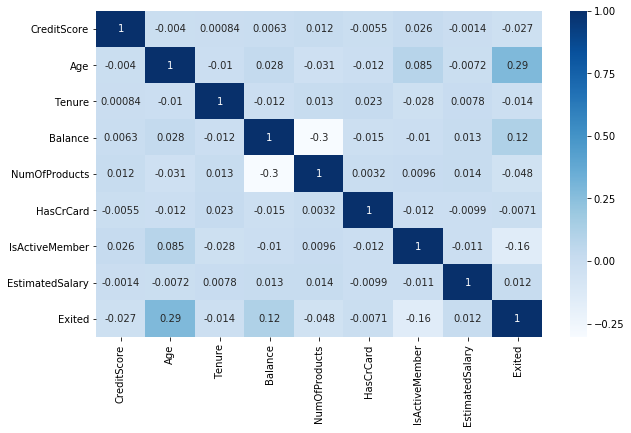

In [11]:
fig, ax = plt.subplots(figsize = (10, 6))

corr = data.corr()
ax = sb.heatmap(corr,
          annot = True,
          cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [12]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


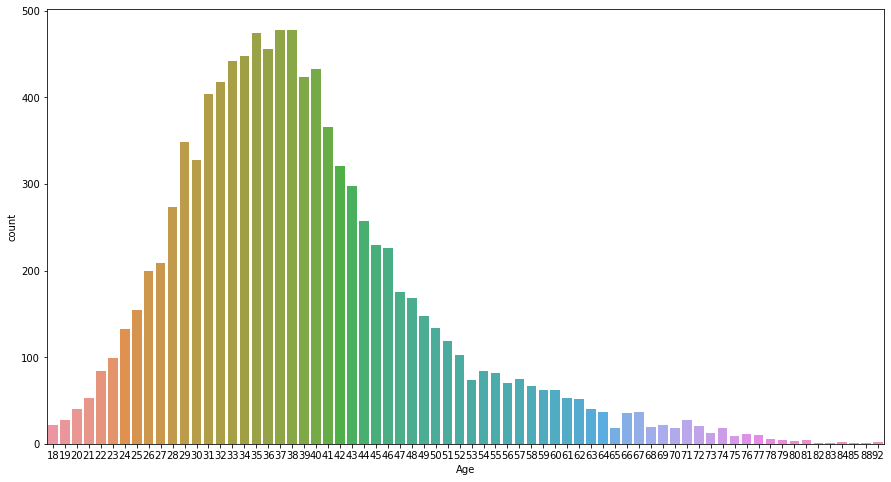

In [13]:
fig, ax = plt.subplots(figsize = (15, 8))

sb.countplot(data['Age'])
plt.show()

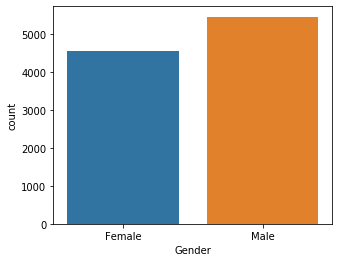

In [14]:
fig, ax = plt.subplots(figsize = (5, 4))

sb.countplot(data['Gender'])
plt.show()

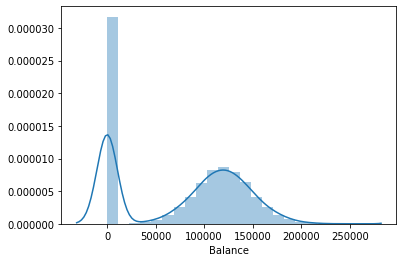

In [15]:
sb.distplot(data['Balance'])
plt.show()

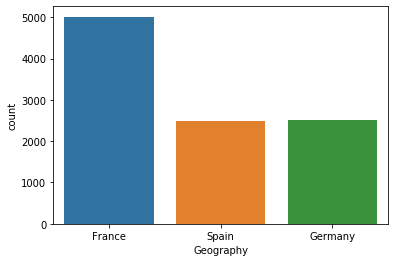

In [16]:
sb.countplot(data['Geography'])
plt.show()

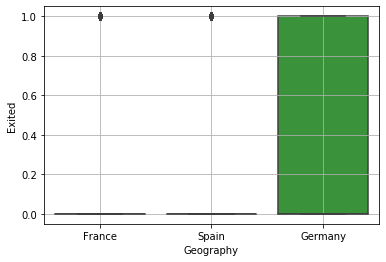

In [17]:
sb.boxplot(x = 'Geography', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

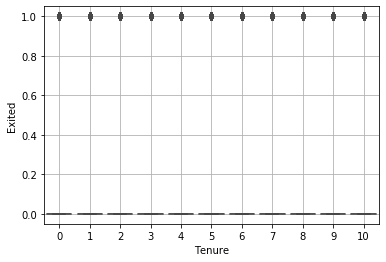

In [18]:
sb.boxplot(x = 'Tenure', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

In [19]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing

In [20]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [21]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [22]:
sc = StandardScaler()
data.iloc[:, [0,3,5,9]] = sc.fit_transform(data.iloc[:,[0,3,5,9]])

In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


In [24]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1:].values

In [25]:
X.shape, Y.shape

((10000, 10), (10000, 1))

In [26]:
X[1]

array([-0.4400359548576657, 'Spain', 'Female', 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [27]:
lb = LabelEncoder()
X[:, 1] = lb.fit_transform(X[:, 1])
X[:, 2] = lb.fit_transform(X[:, 2])

In [28]:
X[1]

array([-0.4400359548576657, 2, 0, 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [29]:
ohe = OneHotEncoder(categorical_features = [1])
X = ohe.fit_transform(X).toarray()

In [30]:
X[1]

array([ 0.        ,  0.        ,  1.        , -0.44003595,  0.        ,
        0.19816383,  1.        ,  0.11735002,  1.        ,  0.        ,
        1.        ,  0.21653375])

In [31]:
X = X[:, 1:]

In [32]:
X[1]

array([ 0.        ,  1.        , -0.44003595,  0.        ,  0.19816383,
        1.        ,  0.11735002,  1.        ,  0.        ,  1.        ,
        0.21653375])

In [33]:
X.shape

(10000, 11)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 11), (8000, 1), (2000, 11), (2000, 1))

# Creating Placeholders

To create placeholders we need to disable the eager execution as place holders are not compatible with eager execution

In [36]:
tf.compat.v1.disable_eager_execution()

In [37]:
x = tf.compat.v1.placeholder(dtype = 'float32', shape = [None, 11], name = 'x')
y = tf.compat.v1.placeholder(dtype = 'float32', shape = [None, 1], name = 'y')

In [38]:
x, y

(<tf.Tensor 'x:0' shape=(None, 11) dtype=float32>,
 <tf.Tensor 'y:0' shape=(None, 1) dtype=float32>)

# Initialising weights and bias

In [39]:
sigma = 1
weight_initializer = tf.compat.v1.variance_scaling_initializer(mode = 'fan_avg', distribution = 'uniform', scale = sigma, seed = 42) 
bias_initializer = tf.zeros_initializer()

In [40]:
#Weights and Bias of 1st Layer
w1 = tf.Variable(weight_initializer([x_train.shape[1], 10]))
b1 = tf.Variable(bias_initializer([10]))

#Weights and Bias of 2nd layer
w2 = tf.Variable(weight_initializer([10, 6]))
b2 = tf.Variable(bias_initializer([6]))

#Weights and Bias of 3rd layer
# w3 = tf.Variable(weight_initializer([10, 8]))
# b3 = tf.Variable(bias_initializer([8]))


#Weights and Bias of output layer
wo = tf.Variable(weight_initializer([6, 2]))
bo = tf.Variable(bias_initializer([2]))

init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [41]:
w1, b1

(<tf.Variable 'Variable:0' shape=(11, 10) dtype=float32>,
 <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32>)

In [42]:
w2, b2

(<tf.Variable 'Variable_2:0' shape=(10, 6) dtype=float32>,
 <tf.Variable 'Variable_3:0' shape=(6,) dtype=float32>)

In [43]:
# w3, b3

In [44]:
wo, bo

(<tf.Variable 'Variable_4:0' shape=(6, 2) dtype=float32>,
 <tf.Variable 'Variable_5:0' shape=(2,) dtype=float32>)

# Forward Propagation

In [45]:
#Layer1 with relu activation function
hidden1 = tf.add(tf.matmul(x, w1), b1)
hidden1 = tf.nn.relu(hidden1)

#layer2 with relu activation function
hidden2 = tf.add(tf.matmul(hidden1, w2), b2)
hidden2 = tf.nn.relu(hidden2)

#layer3
# hidden3 = tf.add(tf.matmul(hidden2, w3), b3)
# hidden3 = tf.nn.relu(hidden3)

#output layer with sigmoid activation function
out = tf.add(tf.matmul(hidden2, wo), bo)
out = tf.nn.sigmoid(out, name = 'output')

In [46]:
hidden1, hidden2, out

(<tf.Tensor 'Relu:0' shape=(None, 10) dtype=float32>,
 <tf.Tensor 'Relu_1:0' shape=(None, 6) dtype=float32>,
 <tf.Tensor 'output:0' shape=(None, 2) dtype=float32>)

# Cost Function

In [47]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = out, labels = y))

In [48]:
cost_function

<tf.Tensor 'Mean:0' shape=() dtype=float32>

# Optimizer

In [49]:
learning_rate = 0.01
opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

# launching the graph in Session

In [50]:
sess = tf.compat.v1.Session()
sess.run(init)

In [51]:
sess

# Back Propagation

In [52]:
Training_loss = [ ]
Test_loss = [ ]
pred = [ ]
epochs = 1000
for epoch in range (epochs):
    sess.run(opt, feed_dict = {x: x_train, y: y_train})
    Training_loss.append(sess.run(cost_function, feed_dict = {x: x_train, y: y_train}))
    Test_loss.append(sess.run(cost_function, feed_dict = {x: x_test, y: y_test}))
    
    
    print('Epoch:', epoch, 'Training Loss:', Training_loss[epoch], 'Test Loss:', Test_loss[epoch])

Epoch: 0 Training Loss: 0.2833342 Test Loss: 0.2812278
Epoch: 1 Training Loss: 0.28332794 Test Loss: 0.2812204
Epoch: 2 Training Loss: 0.2833217 Test Loss: 0.28121307
Epoch: 3 Training Loss: 0.2833156 Test Loss: 0.28120574
Epoch: 4 Training Loss: 0.2833095 Test Loss: 0.28119847
Epoch: 5 Training Loss: 0.28330353 Test Loss: 0.28119135
Epoch: 6 Training Loss: 0.2832976 Test Loss: 0.28118426
Epoch: 7 Training Loss: 0.28329176 Test Loss: 0.2811773
Epoch: 8 Training Loss: 0.28328606 Test Loss: 0.28117043
Epoch: 9 Training Loss: 0.28328034 Test Loss: 0.2811637
Epoch: 10 Training Loss: 0.28327477 Test Loss: 0.28115702
Epoch: 11 Training Loss: 0.28326926 Test Loss: 0.2811504
Epoch: 12 Training Loss: 0.2832639 Test Loss: 0.281144
Epoch: 13 Training Loss: 0.2832586 Test Loss: 0.28113762
Epoch: 14 Training Loss: 0.28325328 Test Loss: 0.2811314
Epoch: 15 Training Loss: 0.2832481 Test Loss: 0.28112528
Epoch: 16 Training Loss: 0.2832431 Test Loss: 0.2811192
Epoch: 17 Training Loss: 0.28323814 Test L

Epoch: 154 Training Loss: 0.28295872 Test Loss: 0.2808283
Epoch: 155 Training Loss: 0.282958 Test Loss: 0.2808277
Epoch: 156 Training Loss: 0.2829573 Test Loss: 0.28082705
Epoch: 157 Training Loss: 0.28295648 Test Loss: 0.2808264
Epoch: 158 Training Loss: 0.28295583 Test Loss: 0.28082576
Epoch: 159 Training Loss: 0.28295508 Test Loss: 0.28082517
Epoch: 160 Training Loss: 0.28295434 Test Loss: 0.28082457
Epoch: 161 Training Loss: 0.28295362 Test Loss: 0.28082398
Epoch: 162 Training Loss: 0.2829529 Test Loss: 0.28082335
Epoch: 163 Training Loss: 0.28295222 Test Loss: 0.28082278
Epoch: 164 Training Loss: 0.28295153 Test Loss: 0.28082225
Epoch: 165 Training Loss: 0.28295085 Test Loss: 0.28082165
Epoch: 166 Training Loss: 0.2829502 Test Loss: 0.28082108
Epoch: 167 Training Loss: 0.28294948 Test Loss: 0.2808205
Epoch: 168 Training Loss: 0.2829488 Test Loss: 0.28081995
Epoch: 169 Training Loss: 0.2829481 Test Loss: 0.28081936
Epoch: 170 Training Loss: 0.28294745 Test Loss: 0.28081885
Epoch: 1

Epoch: 314 Training Loss: 0.28288954 Test Loss: 0.28077367
Epoch: 315 Training Loss: 0.28288934 Test Loss: 0.2807735
Epoch: 316 Training Loss: 0.28288904 Test Loss: 0.2807733
Epoch: 317 Training Loss: 0.28288883 Test Loss: 0.28077313
Epoch: 318 Training Loss: 0.2828886 Test Loss: 0.28077295
Epoch: 319 Training Loss: 0.28288835 Test Loss: 0.2807728
Epoch: 320 Training Loss: 0.28288808 Test Loss: 0.28077266
Epoch: 321 Training Loss: 0.28288788 Test Loss: 0.28077245
Epoch: 322 Training Loss: 0.2828876 Test Loss: 0.2807723
Epoch: 323 Training Loss: 0.2828874 Test Loss: 0.28077212
Epoch: 324 Training Loss: 0.28288716 Test Loss: 0.28077197
Epoch: 325 Training Loss: 0.2828869 Test Loss: 0.2807718
Epoch: 326 Training Loss: 0.28288668 Test Loss: 0.28077164
Epoch: 327 Training Loss: 0.28288645 Test Loss: 0.2807715
Epoch: 328 Training Loss: 0.28288618 Test Loss: 0.28077132
Epoch: 329 Training Loss: 0.282886 Test Loss: 0.28077114
Epoch: 330 Training Loss: 0.28288573 Test Loss: 0.280771
Epoch: 331 

Epoch: 477 Training Loss: 0.2828618 Test Loss: 0.28075477
Epoch: 478 Training Loss: 0.28286165 Test Loss: 0.2807547
Epoch: 479 Training Loss: 0.28286153 Test Loss: 0.28075463
Epoch: 480 Training Loss: 0.28286144 Test Loss: 0.28075454
Epoch: 481 Training Loss: 0.2828613 Test Loss: 0.28075445
Epoch: 482 Training Loss: 0.28286117 Test Loss: 0.2807544
Epoch: 483 Training Loss: 0.28286102 Test Loss: 0.28075433
Epoch: 484 Training Loss: 0.28286096 Test Loss: 0.28075427
Epoch: 485 Training Loss: 0.28286085 Test Loss: 0.2807542
Epoch: 486 Training Loss: 0.28286073 Test Loss: 0.28075415
Epoch: 487 Training Loss: 0.2828606 Test Loss: 0.28075403
Epoch: 488 Training Loss: 0.28286052 Test Loss: 0.28075397
Epoch: 489 Training Loss: 0.28286037 Test Loss: 0.2807539
Epoch: 490 Training Loss: 0.28286028 Test Loss: 0.28075382
Epoch: 491 Training Loss: 0.28286016 Test Loss: 0.28075373
Epoch: 492 Training Loss: 0.28286 Test Loss: 0.28075373
Epoch: 493 Training Loss: 0.28285992 Test Loss: 0.2807536
Epoch: 4

Epoch: 630 Training Loss: 0.28284767 Test Loss: 0.2807465
Epoch: 631 Training Loss: 0.28284758 Test Loss: 0.28074646
Epoch: 632 Training Loss: 0.28284752 Test Loss: 0.28074643
Epoch: 633 Training Loss: 0.28284746 Test Loss: 0.28074637
Epoch: 634 Training Loss: 0.2828474 Test Loss: 0.28074634
Epoch: 635 Training Loss: 0.28284732 Test Loss: 0.28074628
Epoch: 636 Training Loss: 0.28284726 Test Loss: 0.28074625
Epoch: 637 Training Loss: 0.28284717 Test Loss: 0.28074622
Epoch: 638 Training Loss: 0.2828471 Test Loss: 0.28074616
Epoch: 639 Training Loss: 0.28284705 Test Loss: 0.28074616
Epoch: 640 Training Loss: 0.282847 Test Loss: 0.2807461
Epoch: 641 Training Loss: 0.28284693 Test Loss: 0.28074607
Epoch: 642 Training Loss: 0.28284684 Test Loss: 0.280746
Epoch: 643 Training Loss: 0.28284678 Test Loss: 0.28074598
Epoch: 644 Training Loss: 0.28284675 Test Loss: 0.28074592
Epoch: 645 Training Loss: 0.2828467 Test Loss: 0.28074592
Epoch: 646 Training Loss: 0.2828466 Test Loss: 0.28074592
Epoch: 

Epoch: 780 Training Loss: 0.28283903 Test Loss: 0.28074193
Epoch: 781 Training Loss: 0.282839 Test Loss: 0.28074193
Epoch: 782 Training Loss: 0.28283894 Test Loss: 0.28074187
Epoch: 783 Training Loss: 0.28283888 Test Loss: 0.28074187
Epoch: 784 Training Loss: 0.28283885 Test Loss: 0.28074184
Epoch: 785 Training Loss: 0.28283876 Test Loss: 0.2807418
Epoch: 786 Training Loss: 0.28283873 Test Loss: 0.2807418
Epoch: 787 Training Loss: 0.28283867 Test Loss: 0.28074175
Epoch: 788 Training Loss: 0.2828386 Test Loss: 0.28074175
Epoch: 789 Training Loss: 0.28283855 Test Loss: 0.28074175
Epoch: 790 Training Loss: 0.2828385 Test Loss: 0.28074175
Epoch: 791 Training Loss: 0.2828385 Test Loss: 0.2807417
Epoch: 792 Training Loss: 0.28283843 Test Loss: 0.2807417
Epoch: 793 Training Loss: 0.28283837 Test Loss: 0.28074163
Epoch: 794 Training Loss: 0.2828383 Test Loss: 0.28074163
Epoch: 795 Training Loss: 0.2828383 Test Loss: 0.2807416
Epoch: 796 Training Loss: 0.28283826 Test Loss: 0.28074157
Epoch: 79

Epoch: 943 Training Loss: 0.28283244 Test Loss: 0.28073892
Epoch: 944 Training Loss: 0.2828324 Test Loss: 0.2807389
Epoch: 945 Training Loss: 0.28283238 Test Loss: 0.2807389
Epoch: 946 Training Loss: 0.28283238 Test Loss: 0.28073886
Epoch: 947 Training Loss: 0.28283232 Test Loss: 0.28073886
Epoch: 948 Training Loss: 0.28283226 Test Loss: 0.28073883
Epoch: 949 Training Loss: 0.28283226 Test Loss: 0.28073883
Epoch: 950 Training Loss: 0.28283224 Test Loss: 0.2807388
Epoch: 951 Training Loss: 0.2828322 Test Loss: 0.2807388
Epoch: 952 Training Loss: 0.28283215 Test Loss: 0.28073877
Epoch: 953 Training Loss: 0.28283212 Test Loss: 0.28073877
Epoch: 954 Training Loss: 0.28283212 Test Loss: 0.28073877
Epoch: 955 Training Loss: 0.28283206 Test Loss: 0.2807387
Epoch: 956 Training Loss: 0.28283203 Test Loss: 0.2807387
Epoch: 957 Training Loss: 0.282832 Test Loss: 0.2807387
Epoch: 958 Training Loss: 0.282832 Test Loss: 0.2807387
Epoch: 959 Training Loss: 0.28283194 Test Loss: 0.2807387
Epoch: 960 T

In [53]:
y_pred = sess.run(out, feed_dict = {x: x_test})

In [54]:
prediction = tf.argmax(out, axis = 1)

In [55]:
pred = [ ]
for i in range(2000):
    pred.append(sess.run(prediction, feed_dict = {x: x_test[i].reshape(1, 11)}))

In [56]:
pred[10]

array([0])

In [57]:
cm = confusion_matrix(y_test, pred)
cm

array([[1518,   77],
       [ 369,   36]])

In [58]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1595
           1       0.32      0.09      0.14       405

    accuracy                           0.78      2000
   macro avg       0.56      0.52      0.51      2000
weighted avg       0.71      0.78      0.72      2000



In [59]:
print(accuracy_score(y_test, pred))

0.777


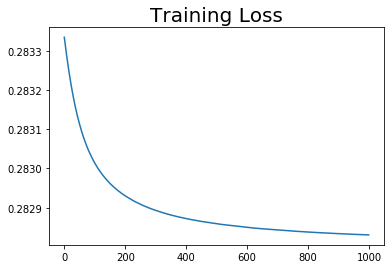

In [60]:
plt.plot(Training_loss)
plt.title('Training Loss', fontsize = 20)
plt.show()

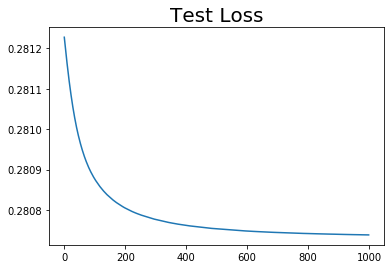

In [61]:
plt.plot(Test_loss)
plt.title('Test Loss', fontsize = 20)
plt.show()

# Saving the Model

In [62]:
saver = tf.compat.v1.train.Saver()
saver.save(sess,'classification_models/Bank.ckpt')

'classification_models/Bank.ckpt'

# Loading the model

In [63]:
with tf.compat.v1.Session() as ses:
    saver = tf.compat.v1.train.import_meta_graph('/home/admin1/Tensorflow/classification_models/Bank.ckpt.meta')
    model = saver.restore(ses, tf.train.latest_checkpoint('/home/admin1/Tensorflow/classification_models/'))
    
    graph = tf.compat.v1.get_default_graph()
    input_x = graph.get_tensor_by_name("x:0")
    input_y = graph.get_tensor_by_name("y:0")
    
    output = graph.get_tensor_by_name("output:0")
    
    
    feed_dict = {input_x: x_test}
    predictions = output.eval(feed_dict = feed_dict)
    print(predictions)

INFO:tensorflow:Restoring parameters from /home/admin1/Tensorflow/classification_models/Bank.ckpt
[[4.5239925e-05 2.2351742e-05]
 [1.9484967e-02 1.5077114e-02]
 [5.5998564e-05 2.8192997e-05]
 ...
 [2.6373893e-02 2.0893753e-02]
 [2.3126900e-03 1.6753674e-03]
 [5.8323145e-05 2.9444695e-05]]


In [64]:
predict = tf.argmax(output, axis = 1)

In [81]:
result = [ ]
for i in range(2000):
    result.append(sess.run(predict, feed_dict = {input_x: x_test[i].reshape(1, 11)}))

In [82]:
result[0:5]

[array([0]), array([0]), array([0]), array([0]), array([0])]

# Predicting for one input value

In [69]:
a = X[500]

In [70]:
a

array([ 0.        ,  1.        , -0.98841507,  1.        , -0.66001848,
        4.        , -1.22584767,  2.        ,  1.        ,  1.        ,
       -0.79440693])

In [71]:
a.shape

(11,)

In [73]:
a = np.reshape(a, (1, 11))

In [74]:
a.shape

(1, 11)

In [75]:
with tf.compat.v1.Session() as ses:
    saver = tf.compat.v1.train.import_meta_graph('/home/admin1/Tensorflow/classification_models/Bank.ckpt.meta')
    model = saver.restore(ses, tf.train.latest_checkpoint('/home/admin1/Tensorflow/classification_models/'))
    
    graph = tf.compat.v1.get_default_graph()
    input_x = graph.get_tensor_by_name("x:0")
    input_y = graph.get_tensor_by_name("y:0")
    
    output = graph.get_tensor_by_name("output:0")
    
    
    feed_dict = {input_x: a}
    prediction = output.eval(feed_dict = feed_dict)
    print(prediction)

INFO:tensorflow:Restoring parameters from /home/admin1/Tensorflow/classification_models/Bank.ckpt
[[0.00136606 0.00086753]]


In [76]:
result_a = tf.argmax(output, axis = 1)

In [83]:
sess.run(result_a, feed_dict = {input_x: a.reshape(1, 11)})

array([0])